In [2]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [1]:
dir="C:/Users/mealiy001/OneDrive/OneDrive - Universität Bayreuth/PhD/geophysics/"

In [ ]:
#data = ert.load(dir + '11Aug/nuna_a32_transect_long.dat')
#data.save(dir + '11Aug/nuna_a32_transect_long.txt', "a b m n err rhoa")

13/08/25 - 18:58:21 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [3]:
data = ert.load(dir + 'tuk_e20_h1.tx0')

29/10/25 - 09:50:18 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
29/10/25 - 09:50:18 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
29/10/25 - 09:50:18 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
29/10/25 - 09:50:18 - pyGIMLi - INFO - No electrode positions found!


29/10/25 - 09:50:18 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 565


In [8]:
data['err'] = data['err'] + 0.02

In [4]:
data['r'] = data['u']/data['i']
data['err'] = data['err']*data['r']

Slope: 0.0007357045973641433
Intercept: -0.0005269036867791124


Text(0, 0.5, 'err')

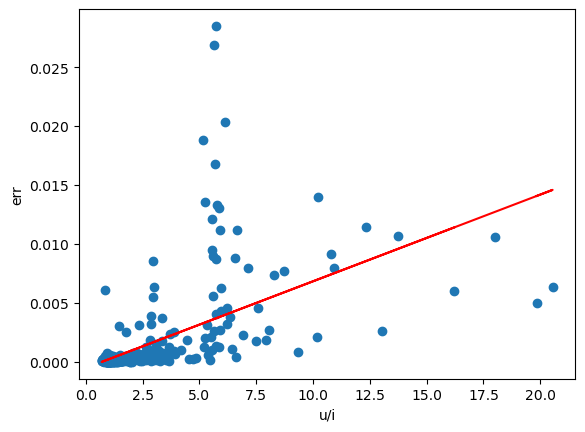

In [5]:
x = data['r']
y = data['err']

# Fit a line (degree 1 polynomial)
slope, intercept = np.polyfit(x, y, 1)

print("Slope:", slope)
print("Intercept:", intercept)

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, slope*x + intercept, color='red', label='Fitted line')
plt.xlabel('u/i')
plt.ylabel('err')

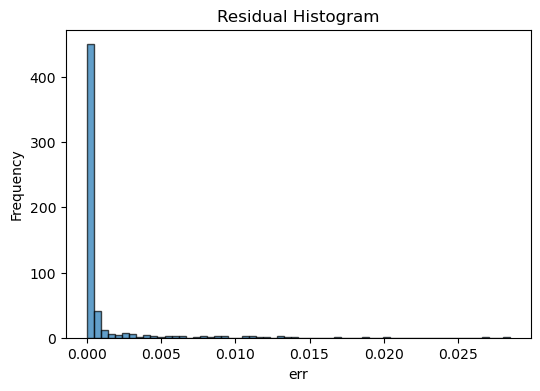

In [6]:
plt.figure(figsize=(6,4))
plt.hist(data['err'], bins=60, edgecolor='k', alpha=0.7)
plt.xlabel('err')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [30]:
data.remove(data['err']>=0.1)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x16f529ffd50>)

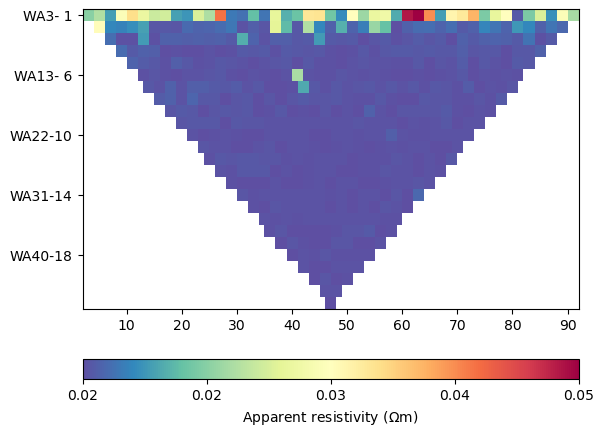

In [9]:
ert.showData(data,data['err'])

In [6]:
data['err'] = ert.estimateError(data, relativeError=0.02, absoluteError=0.0002)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20133653390>)

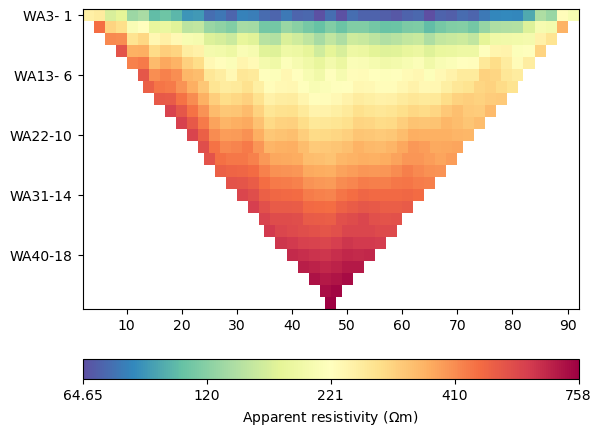

In [7]:
ert.showData(data)

In [10]:
data["k"] = ert.createGeometricFactors(data)

02/10/25 - 10:34:52 - pyGIMLi - INFO - Save RVector binary
02/10/25 - 10:34:52 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2333040371793365947


02/10/25 - 10:35:11 - pyGIMLi - INFO - Found 2 regions.
02/10/25 - 10:35:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/10/25 - 10:35:13 - pyGIMLi - INFO - Found 2 regions.
02/10/25 - 10:35:13 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/10/25 - 10:35:14 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/10/25 - 10:35:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/10/25 - 10:35:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 132387 Cells: 264232 Boundaries: 198444
02/10/25 - 10:35:32 - pyGIMLi - INFO - Use median(data values)=291.974
02/10/25 - 10:35:32 - pyGIMLi - INFO - Created startmodel from forward operator:62787, min/max=291.974000/291.974000
02/10/25 - 10:35:32 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000016F548D4EF0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 64.65/758
min/max (error): 2%/4.85%
min/max (start model): 292/292
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  612.36
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   74.87 (dPhi = 87.64%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   36.92 (dPhi = 50.31%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.93 (dPhi = 91.78%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.60 (dPhi = 12.63%) lam: 50.

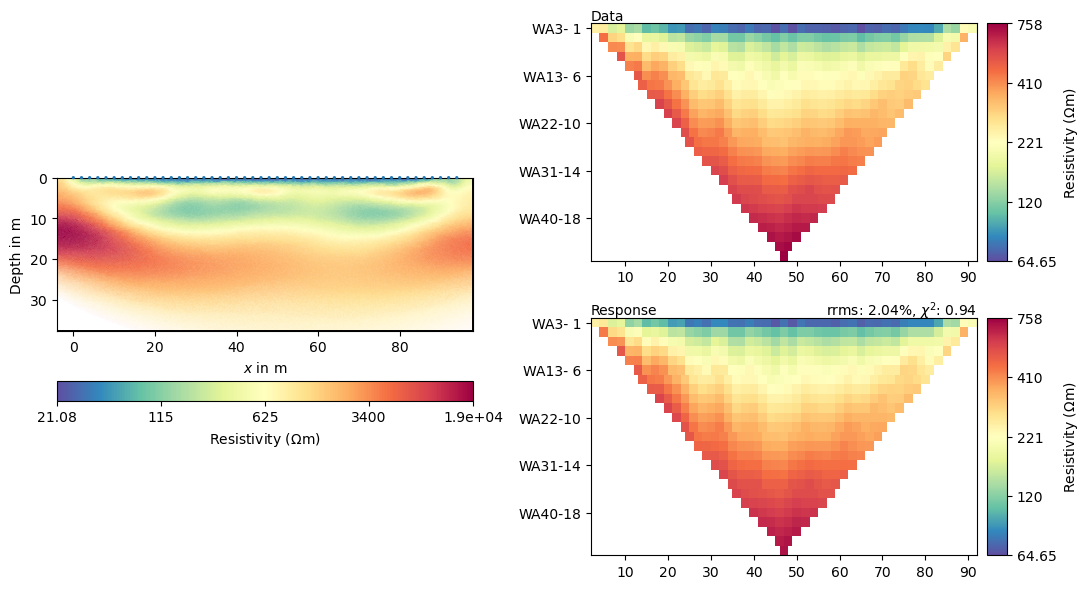

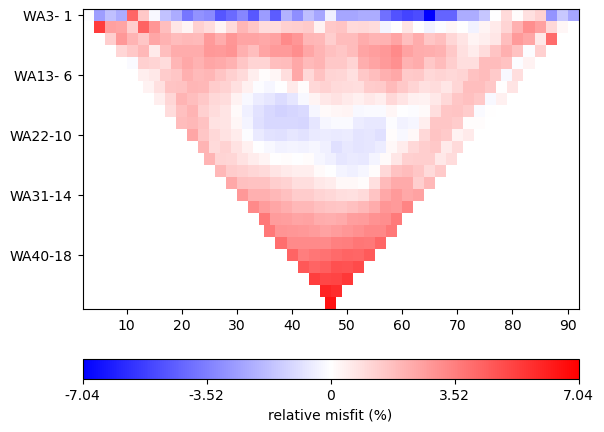

In [11]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, zWeight=0.1, paraDZ= 0.25, lam=50, paraMaxCellSize=0.1)
mgr.showResultAndFit()
mgr.showMisfit()

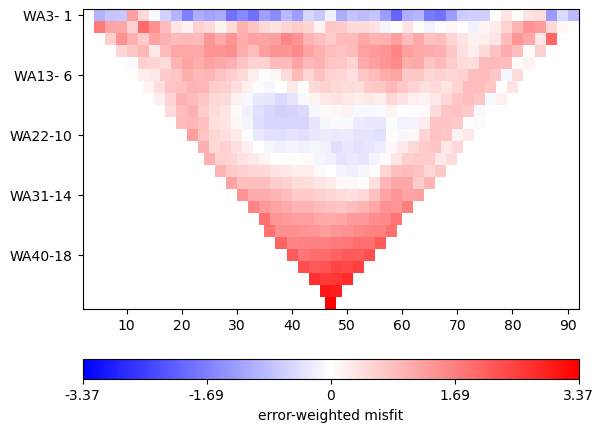

In [12]:
mgr.showMisfit(errorWeighted=True)

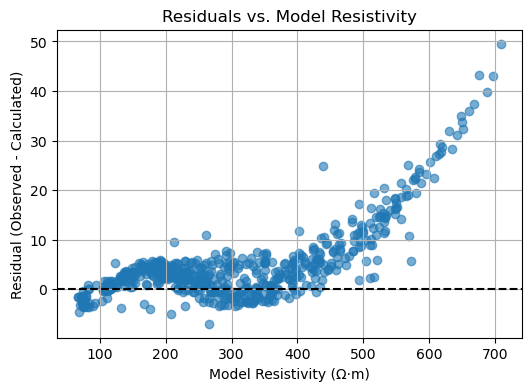

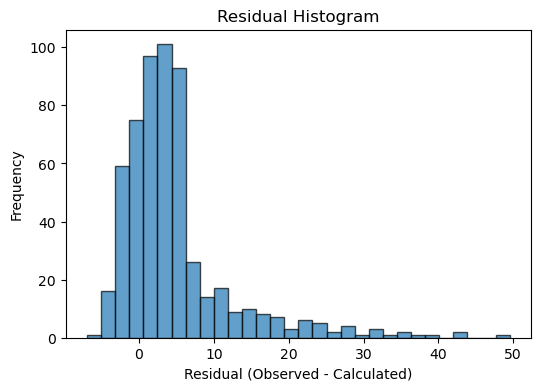

In [14]:
d_calc = mgr.inv.response.array()  # calculated apparent resistivity
d_obs = mgr.data['rhoa']
residuals = d_obs - d_calc


plt.figure(figsize=(6,4))
plt.scatter(d_calc, residuals, alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Model Resistivity (Ω·m)')
plt.ylabel('Residual (Observed - Calculated)')
plt.title('Residuals vs. Model Resistivity')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residual (Observed - Calculated)')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [21]:
spacing = np.abs(data["a"] - data["b"])

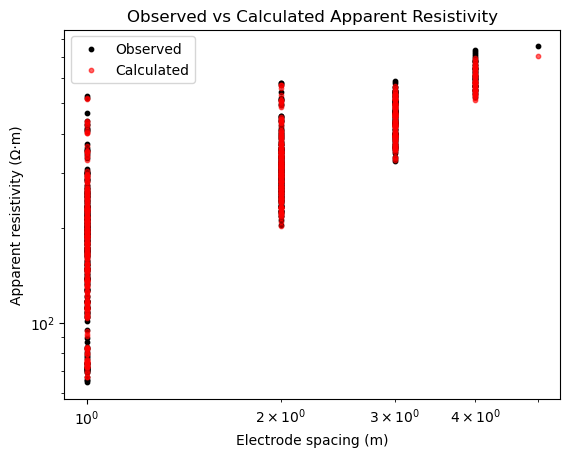

In [22]:
plt.scatter(spacing, d_obs, s=10, c="k", label="Observed")
plt.scatter(spacing, d_calc, s=10, c="r", alpha=0.6, label="Calculated")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Electrode spacing (m)")
plt.ylabel("Apparent resistivity (Ω·m)")
plt.title("Observed vs Calculated Apparent Resistivity")
plt.legend()
plt.show()

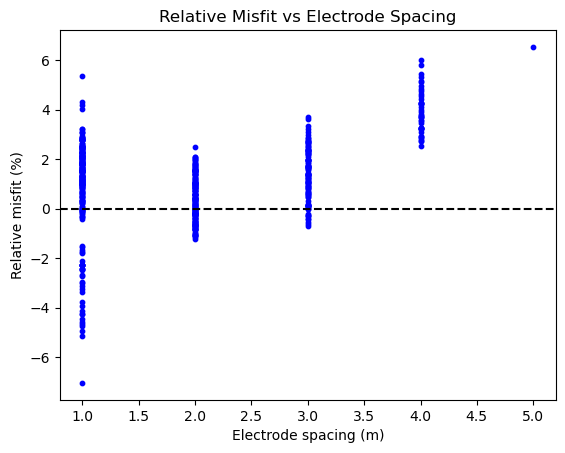

In [23]:
rel_misfit = (d_obs - d_calc) / d_obs * 100
plt.scatter(spacing, rel_misfit, s=10, c="b")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Electrode spacing (m)")
plt.ylabel("Relative misfit (%)")
plt.title("Relative Misfit vs Electrode Spacing")
plt.show()

In [36]:
extra = pd.read_csv(dir + 'tuk_e20_h1_long.csv')

In [54]:
alt = pd.read_csv(dir + 'tuk_e20_h1_al.csv', skiprows=1)


In [55]:
alt = alt.to_numpy()

In [56]:
alt[:, 0]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71], dtype=int64)

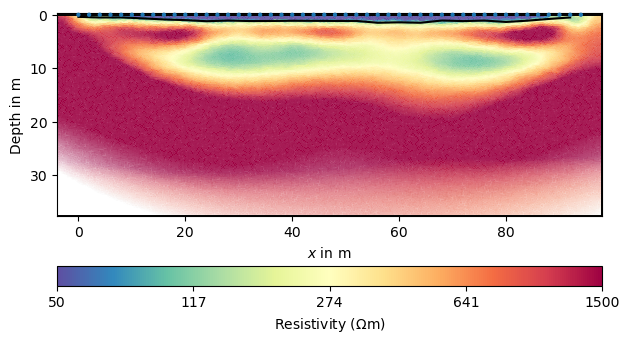

In [63]:

ax, cb = mgr.showResult(cMin=50, cMax=1500)
ax.plot(alt[0:24, 0]*2-2, alt[0:24, 1]/(-100), "k-")

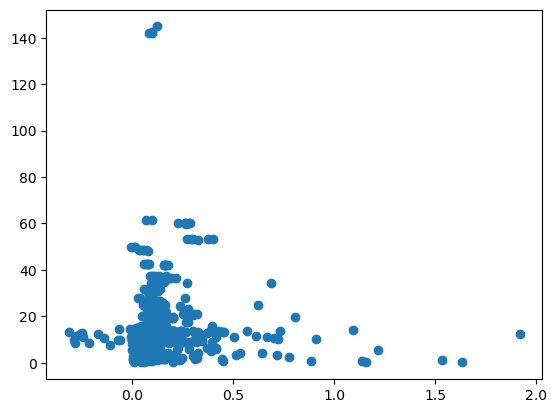

In [34]:
spacing_extra = np.abs(extra["A"] - extra["B"])
plt.scatter(extra["U90"], extra['U(Tx)'])

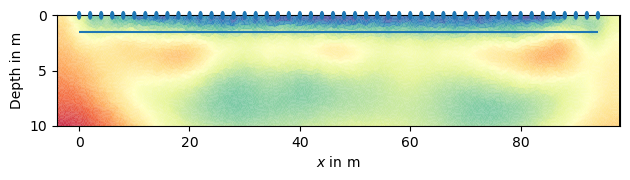

In [13]:
ax, cb = mgr.showResult(colorBar=False)
ax.hlines([-1.5], 0, 94)
ax.set_ylim(-10, 0)
ax.set_aspect(2)



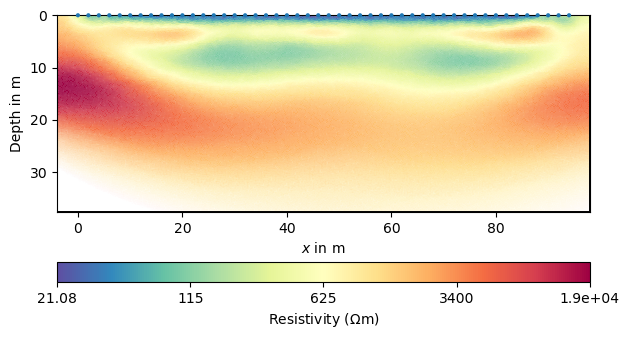

In [17]:
ax, cb = mgr.showResult()

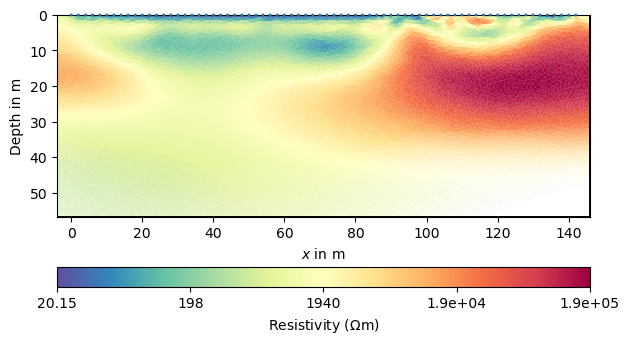

In [72]:
ax, cb = mgr.showResult()